<a href="https://colab.research.google.com/github/Adithya5757/aiml/blob/main/video_face_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import files
uploaded = files.upload()


Saving 3761461-uhd_3840_2160_25fps.mp4 to 3761461-uhd_3840_2160_25fps (1).mp4


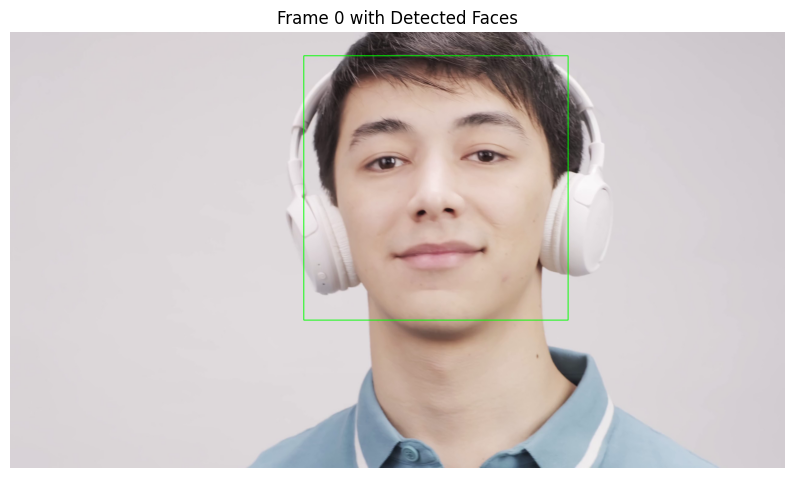

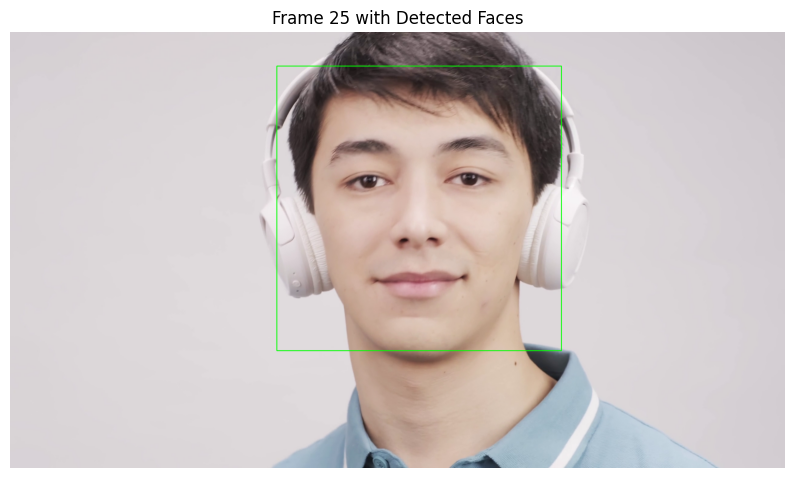

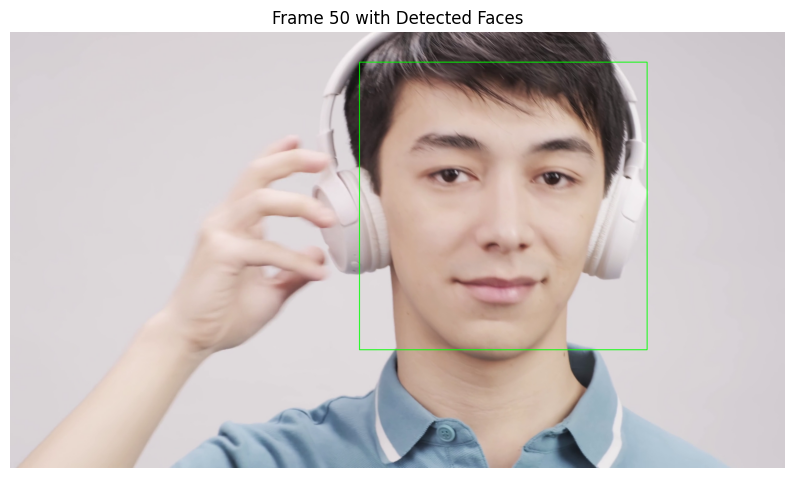

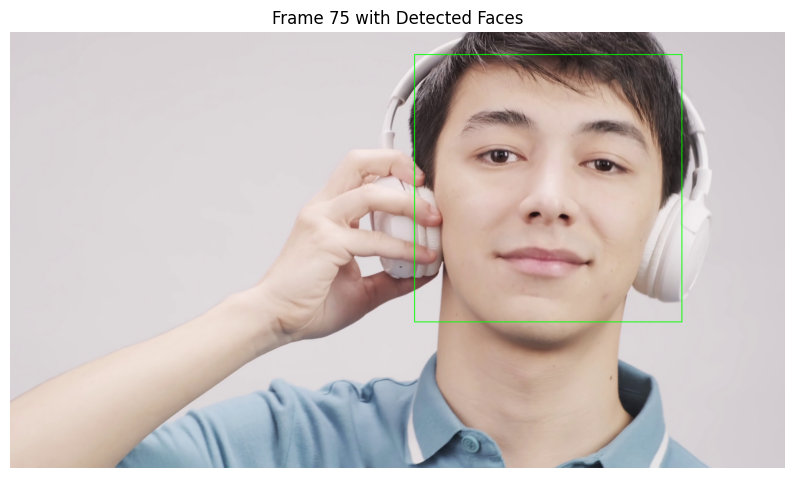

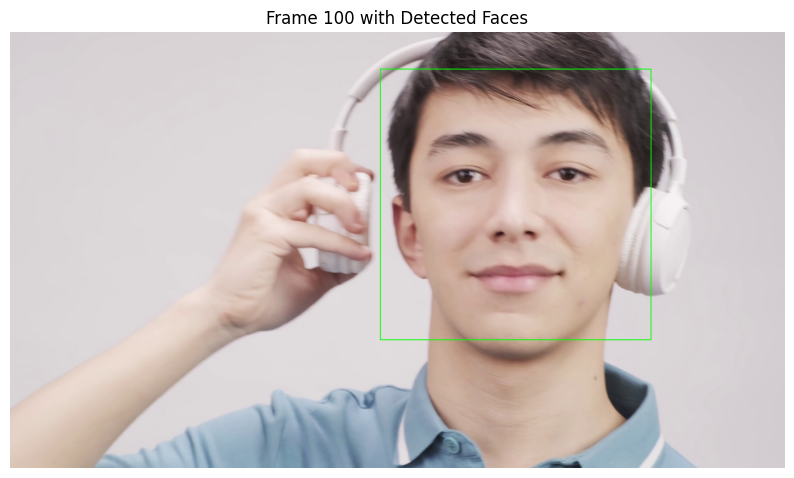

In [18]:
import cv2
import matplotlib.pyplot as plt

# Load Haar Cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

video_path = '3761461-uhd_3840_2160_25fps.mp4'  # Your uploaded video filename

cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    raise Exception("Error opening video file")

frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Create VideoWriter to save the output video
out = cv2.VideoWriter('output_detected_faces.mp4',
                      cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

frame_count = 0
frames_to_show = []

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    out.write(frame)

    # Save some frames for inline display (every 25 frames ~ 1 sec if 25fps)
    if frame_count % int(fps) == 0 and len(frames_to_show) < 5:
        frames_to_show.append(frame.copy())

    frame_count += 1

cap.release()
out.release()

# Show frames inline to verify detection
for i, img in enumerate(frames_to_show):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 6))
    plt.imshow(img_rgb)
    plt.title(f'Frame {i * int(fps)} with Detected Faces')
    plt.axis('off')
    plt.show()


In [19]:
from google.colab import files
files.download('output_detected_faces.mp4')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>